In [1]:
# Install Anaconda for Python 3
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
from scipy import optimize

# pip install datascience
from datascience import *

## Data

In [2]:
# Ames, Iowa housing data set. See:
# http://ww2.amstat.org/publications/jse/v19n3/decock.pdf

all_sales = Table.read_table('e13.csv')
all_sales

Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,526301100,20,RL,141,31770,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,TA,TA,CBlock,TA,Gd,Gd,BLQ,639,Unf,0,441,1080,GasA,Fa,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960,Fin,2,528,TA,TA,P,210,62,0,0,0,0,nan,nan,nan,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80,11622,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,nan,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,nan,MnPrv,nan,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81,14267,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,nan,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,nan,nan,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93,11160,Pave,nan,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0,Gd,TA,CBlock,TA,TA,No,ALQ,1065,Unf,0,1045,2110,GasA,Ex,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968,Fin,2,522,TA,TA,Y,0,0,0,0,0,0,nan,nan,nan,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74,13830,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,nan,MnPrv,nan,0,3,2010,WD,Normal,189900
6,527105030,60,RL,78,9978,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,Ex,Y,SBrkr,926,678,0,1604,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,470,TA,TA,Y,360,36,0,0,0,0,nan,nan,nan,0,6,2010,WD,Normal,195500
7,527127150,120,RL,41,4920,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616,Unf,0,722,1338,GasA,Ex,Y,SBrkr,1338,0,0,1338,1,0,2,0,2,1,Gd,6,Typ,0,nan,Attchd,2001,Fin,2,582,TA,TA,Y,0,0,170,0,0,0,nan,nan,nan,0,4,2010,WD,Normal,213500
8,527145080,120,RL,43,5005,Pave,nan,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,GasA,Ex,Y,SBrkr,1280,0,0,1280,0,0,2,0,2,1,Gd,5,Typ,0,nan,Attchd,1992,RFn,2,506,TA,TA,Y,0,82,0,0,144,0,nan,nan,nan,0,1,2010,WD,Normal,191500
9,527146030,120,RL,39,5389,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,None,0,Gd,TA,PConc,Gd,TA,No,GLQ,1180,Unf,0,415,1595,GasA,Ex,Y,SBrkr,1616,0,0,1616,1,0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1995,RFn,2,608,TA,TA,Y,237,152,0,0,0,0,nan,nan,nan,0,3,2010,WD,Normal,236500
10,527162130,60,RL,60,7500,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7

In [3]:
sales = all_sales\
  .where('Bldg Type', '1Fam')\
  .where('Sale Condition', 'Normal')\
  .select(
        'SalePrice',
        '1st Flr SF', 
        '2nd Flr SF', 
        'Total Bsmt SF', 
        'Garage Area', 
        'Wood Deck SF', 
        'Open Porch SF',
        'Lot Area', 
        'Overall Qual', 
        'Overall Cond', 
        'Year Built', 
        'Yr Sold', 
        )
sales.sort('SalePrice')

SalePrice,1st Flr SF,2nd Flr SF,Total Bsmt SF,Garage Area,Wood Deck SF,Open Porch SF,Lot Area,Overall Qual,Overall Cond,Year Built,Yr Sold
35000,498,0,498,216,0,0,8088,2,3,1922,2006
39300,334,0,0,0,0,0,5000,1,3,1946,2007
40000,649,668,649,250,0,54,8500,4,4,1920,2008
45000,612,0,0,308,0,0,5925,2,4,1940,2009
52000,729,0,270,0,0,0,4130,3,6,1935,2008
52500,693,0,693,0,0,20,4118,4,4,1941,2006
55000,723,363,723,400,0,24,11340,2,1,1920,2008
55000,796,0,796,0,0,0,3636,4,4,1922,2008
57625,810,0,0,280,119,24,21780,2,4,1910,2009
58500,864,0,864,200,0,0,8212,3,3,1914,2010


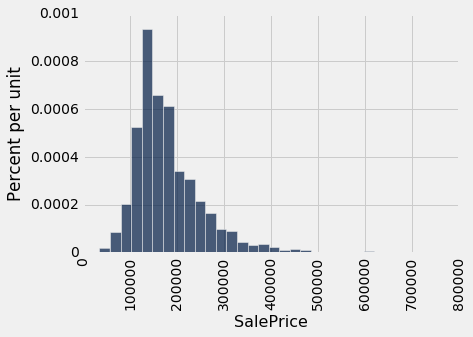

In [4]:
sales.hist('SalePrice', bins=32)

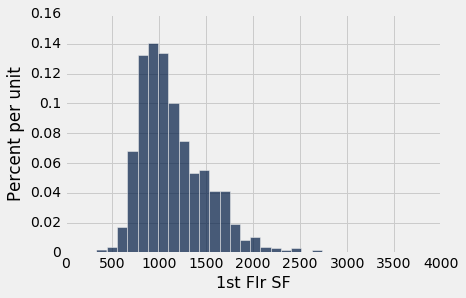

In [5]:
sales.hist('1st Flr SF', bins=32)

## Prediction 

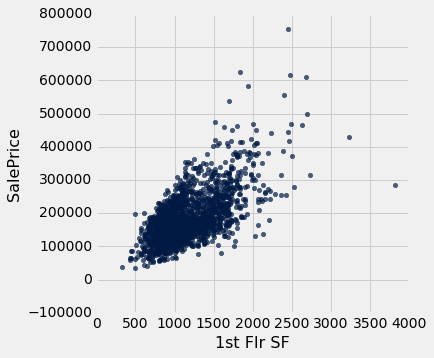

In [6]:
sales.scatter('1st Flr SF', 'SalePrice')

In [7]:
def root_mean_squared_error(f, pairs):
    return np.sqrt(np.average([(y-f(x))**2 for x, y in pairs]))

In [8]:
def lookup_predictor(pairs):
    index = {x: y for x, y in pairs}
    def f(x):
        return index[x]
    return f

In [9]:
def evaluate(f, pairs):
    print('f(1000): ', f(1000))
    print('f(2000): ', f(2000))
    print('error: ', round(root_mean_squared_error(f, pairs), 3))

In [10]:
def size_vs_price(t):
    return list(zip(t['1st Flr SF'], t['SalePrice']))
full = size_vs_price(sales)
f = lookup_predictor(full)
evaluate(f, full)

f(1000):  164000
f(2000):  470000
error:  49797.001


In [11]:
size_vs_price(sales)[:3]

[(1656, 215000), (896, 105000), (1329, 172000)]

In [12]:
sales.group('1st Flr SF').sort(1, descending=True)

1st Flr SF,count
864,39
1040,21
912,16
816,15
894,14
1008,11
960,11
840,11
672,11
988,10


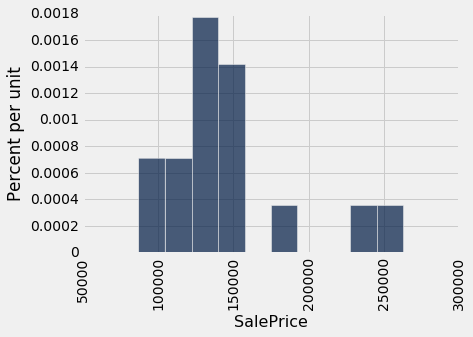

In [13]:
sales.where('1st Flr SF', 912).hist('SalePrice')

In [14]:
def average_predictor(pairs):
    xs = set([x for x, _ in pairs])
    index = {x: np.average([y for xa, y in pairs if xa == x]) for x, _ in pairs}
    def f(x):
        return index[x]
    return f
g = average_predictor(full)
evaluate(g, full)

f(1000):  151000.0
f(2000):  373633.333333
error:  36511.239


## Linear Regression

In [15]:
def linear_predictor(params):
    slope, intercept = params
    def f(x):
        return slope * x + intercept
    return f

In [16]:
f = linear_predictor([150, 0])
evaluate(f, full)

f(1000):  150000
f(2000):  300000
error:  57126.687


In [17]:
def best_linear_predictor(pairs):
    def objective(params):
        f = linear_predictor(params)
        return root_mean_squared_error(f, pairs)
    optimum = optimize.minimize(objective, [1, 1])
    params = optimum['x']
    print('params:', params)
    return linear_predictor(params)

f = best_linear_predictor(full)
evaluate(f, full)

params: [   130.23286085  30064.82741409]
f(1000):  160297.68826
f(2000):  290530.549106
error:  56188.345


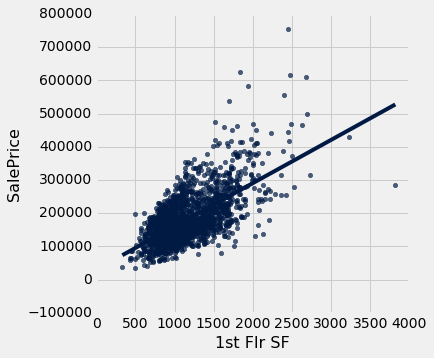

In [18]:
sales.scatter('1st Flr SF', 'SalePrice', fit_line=True)

## Generalization

In [19]:
sales.sample(100)

SalePrice,1st Flr SF,2nd Flr SF,Total Bsmt SF,Garage Area,Wood Deck SF,Open Porch SF,Lot Area,Overall Qual,Overall Cond,Year Built,Yr Sold
137250,864,0,864,280,226,0,7832,5,5,1968,2010
157000,716,716,716,531,0,136,8286,5,7,1977,2007
127000,925,0,925,252,152,0,8540,5,8,1956,2007
183000,798,842,798,595,0,45,7226,7,5,2003,2008
159000,1256,0,1256,311,0,240,8000,5,6,1959,2008
130000,907,0,876,308,0,0,16300,5,4,1977,2007
219500,1057,977,1057,645,576,36,9375,7,5,1997,2009
139400,1056,0,1056,260,390,0,9250,5,7,1954,2007
206900,1092,1020,952,576,280,0,11075,6,5,1969,2008
100000,894,772,894,0,0,156,9839,5,2,1931,2010


In [20]:
sample = size_vs_price(sales.sample(1001))

In [21]:
# evaluate(average_predictor(sample), full)

In [22]:
def nearest_predictor(pairs):
    xs = set([x for x, _ in pairs])
    index = {x: np.average([y for xa, y in pairs if xa == x]) for x, _ in pairs}
    def f(x):
        return index[min(xs, key=lambda y: abs(x-y))]
    return f
evaluate(nearest_predictor(full), full)

f(1000):  151000.0
f(2000):  373633.333333
error:  36511.239


In [23]:
evaluate(nearest_predictor(sample), full)

f(1000):  155450.0
f(2000):  470000.0
error:  55325.647


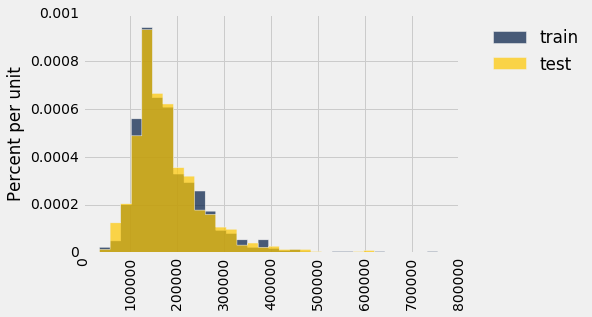

In [24]:
train, test = sales.split(1001)
Table().with_columns(
    'train', train['SalePrice'],
    'test',  test['SalePrice']).hist(bins=32)

In [25]:
evaluate(nearest_predictor(size_vs_price(train)), size_vs_price(test))

f(1000):  151000.0
f(2000):  345000.0
error:  74134.957


In [26]:
evaluate(best_linear_predictor(size_vs_price(train)), size_vs_price(test))

params: [   128.25318875  32515.09878489]
f(1000):  160768.287539
f(2000):  289021.476293
error:  55878.738


params: [   128.25318875  32515.09878489]


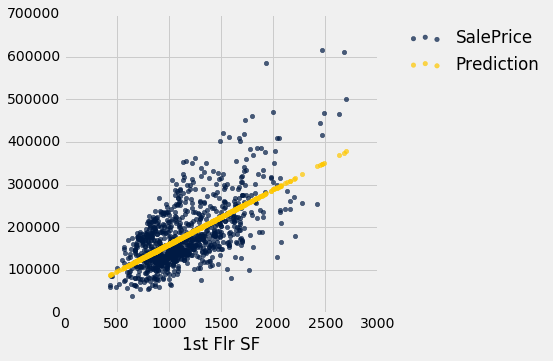

In [27]:
f = best_linear_predictor(size_vs_price(train))

def plot_predictions(t, f, x, line=False):
    u = test.select(x, 'SalePrice').with_column('Prediction', test.apply(f, x))
    u.scatter(x, fit_line=line)
    
plot_predictions(test, f, '1st Flr SF')

## Multiple Regression

In [28]:
sales.row(0)

Row(SalePrice=215000, 1st Flr SF=1656, 2nd Flr SF=0, Total Bsmt SF=1080.0, Garage Area=528.0, Wood Deck SF=210, Open Porch SF=62, Lot Area=31770, Overall Qual=6, Overall Cond=5, Year Built=1960, Yr Sold=2010)

In [29]:
def all_vs_price(t):
    return [(rest, price) for price, *rest in t.rows]
all_vs_price(sales)[:3]

[([1656, 0, 1080.0, 528.0, 210, 62, 31770, 6, 5, 1960, 2010], 215000),
 ([896, 0, 882.0, 730.0, 140, 0, 11622, 5, 6, 1961, 2010], 105000),
 ([1329, 0, 1329.0, 312.0, 393, 36, 14267, 6, 6, 1958, 2010], 172000)]

In [30]:
def multiple_predictor(params):
    def f(xs):
        return sum([p*x for p, x in zip(params[:-1], xs)]) + params[-1]
    return f

In [31]:
f = multiple_predictor([150, 50, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0])
root_mean_squared_error(f, all_vs_price(test))

46961.754465931976

In [32]:
def best_multiple_predictor(pairs):
    def objective(params):
        f = multiple_predictor(params)
        return root_mean_squared_error(f, pairs)
    k = len(pairs[0][0]) + 1
    optimum = optimize.minimize(objective, [1] * k)
    params = optimum['x']
    print('params:', [round(p) for p in params])
    return multiple_predictor(params)

In [33]:
f = best_multiple_predictor(all_vs_price(train))
root_mean_squared_error(f, all_vs_price(test))

params: [67.0, 60.0, 34.0, 29.0, 15.0, -10.0, 1.0, 15662.0, 6446.0, 424.0, -470.0, -0.0]


27160.952079931845

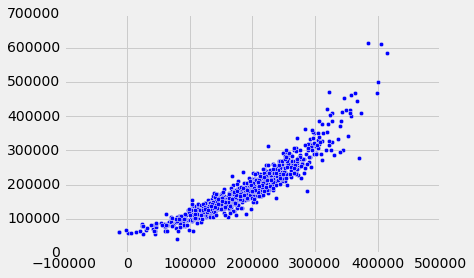

In [34]:
data = all_vs_price(test)
plots.scatter([f(x) for x, _ in data], [y for _, y in data])

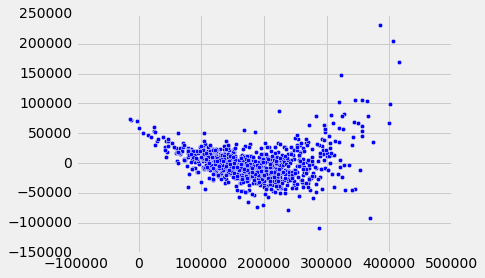

In [35]:
plots.scatter([f(x) for x, y in data], [y-f(x) for x, y in data])

27075.156113056175

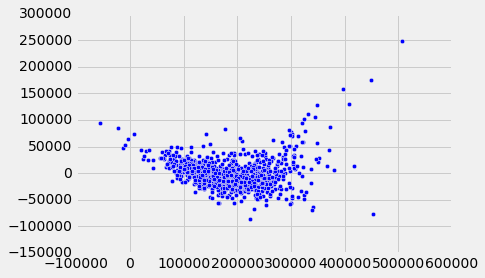

In [36]:
data = all_vs_price(train)
plots.scatter([f(x) for x, y in data], [y-f(x) for x, y in data])
root_mean_squared_error(f, all_vs_price(train))

## Non-Linear Regression

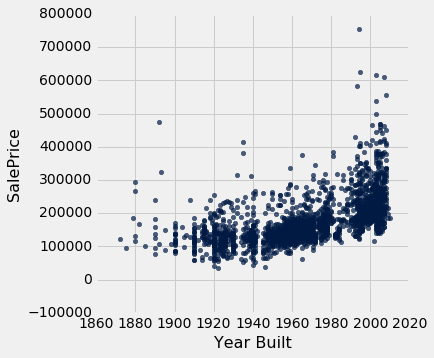

In [37]:
sales.scatter('Year Built', 'SalePrice')

params: [  1.36872888e+03  -2.51259346e+06]


60021.823813190553

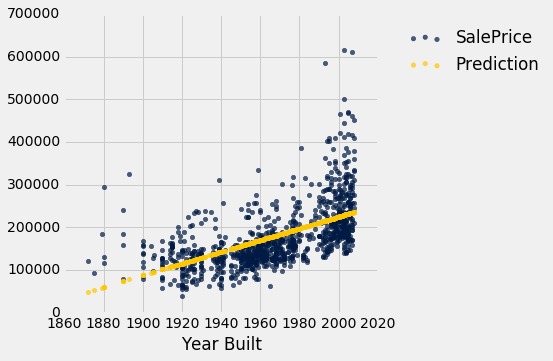

In [38]:
def year_vs_price(t): 
    return list(zip(t['Year Built'], t['SalePrice']))

line = best_linear_predictor(year_vs_price(train))
plot_predictions(test, line, 'Year Built')
root_mean_squared_error(line, year_vs_price(test))

56564.082612428749

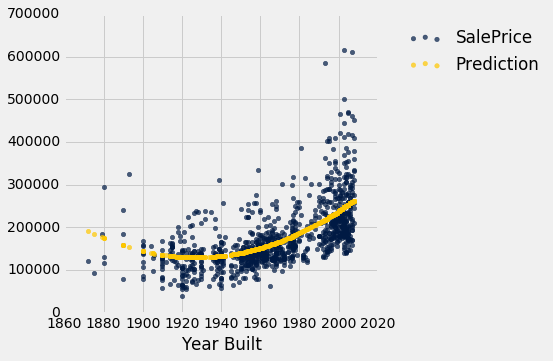

In [39]:
def quadratic(x, a, b, c):
    return a*x*x + b*x + c

a, b, c = optimize.curve_fit(quadratic, train['Year Built'], train['SalePrice'])[0]
curve = lambda x: quadratic(x, a, b, c)
plot_predictions(test, curve, 'Year Built')
root_mean_squared_error(curve, year_vs_price(test))

## Neural Network Regression

In [40]:
# First install tensorflow. See:
# https://www.tensorflow.org/versions/r0.11/get_started/os_setup.html
import tensorflow as tf

In [41]:
def inputs(t):
    def f():
        features = {str(k): tf.constant(t[k]) for k in range(1, len(t))}
        labels = tf.constant(t[0])
        return features, labels
    return f

In [42]:
features = [tf.contrib.layers.real_valued_column(str(k)) for 
            k in range(1, len(sales))]
r = tf.contrib.learn.DNNRegressor(
    feature_columns=features,
    hidden_units=[30, 30],
    enable_centered_bias=True,
    optimizer=tf.train.AdamOptimizer(),
)
%time r.fit(input_fn=inputs(train), steps=50000) # Very slow
print('Done Training')

CPU times: user 2min 54s, sys: 38.8 s, total: 3min 33s
Wall time: 2min 1s
Done Training


Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


18732.146660829039

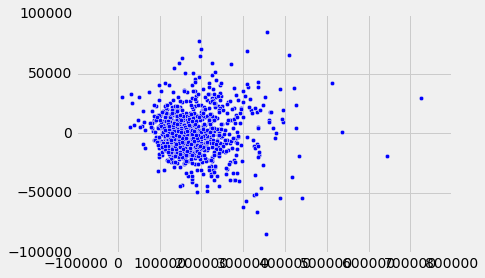

In [43]:
def predict(t):
    predictions = list(r.predict(input_fn=inputs(t)))
    plots.scatter(predictions, t[0] - predictions)
    return root_mean_squared_error(lambda k: predictions[k], 
                                   enumerate(t[0]))
predict(train)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


23267.908036811077

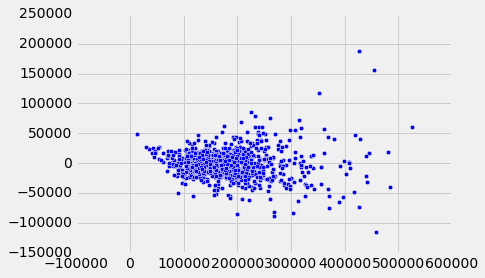

In [44]:
predict(test)